### Code by: Apurva Umredkar (50592382)

- Phase 1 accomplishments: Dataset retrieval, data cleaning and exploratory data analysis (EDA). - Oct 8 2024
- Phase 2 objective: More data cleaning, apply ML algorithms for classifying mentality of gamers - Nov 5 2024

In [1]:
# Importing the libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Reading the dataset loaded from the datafetch.ipynb
gaming_dat = pd.read_csv(
    r"../data/online-gaming-anxiety-data/GamingStudy_data.csv", encoding='ISO-8859-1')
# checking the dataset size
gaming_dat.shape, gaming_dat.columns

((13464, 55),
 Index(['S. No.', 'Timestamp', 'GAD1', 'GAD2', 'GAD3', 'GAD4', 'GAD5', 'GAD6',
        'GAD7', 'GADE', 'SWL1', 'SWL2', 'SWL3', 'SWL4', 'SWL5', 'Game',
        'Platform', 'Hours', 'earnings', 'whyplay', 'League', 'highestleague',
        'streams', 'SPIN1', 'SPIN2', 'SPIN3', 'SPIN4', 'SPIN5', 'SPIN6',
        'SPIN7', 'SPIN8', 'SPIN9', 'SPIN10', 'SPIN11', 'SPIN12', 'SPIN13',
        'SPIN14', 'SPIN15', 'SPIN16', 'SPIN17', 'Narcissism', 'Gender', 'Age',
        'Work', 'Degree', 'Birthplace', 'Residence', 'Reference', 'Playstyle',
        'accept', 'GAD_T', 'SWL_T', 'SPIN_T', 'Residence_ISO3',
        'Birthplace_ISO3'],
       dtype='object'))

In [3]:
# data cleaning: S. No. and timestamp are irrelevant, dropping these columns
gaming_dat = gaming_dat.drop(
    columns=["S. No.", "Timestamp", "highestleague"], axis=1)

# data cleaning 2: replace NaN values to 0
# gaming_dat = gaming_dat.fillna(0)

gaming_dat.head()

,GAD1,GAD2,GAD3,GAD4,GAD5,GAD6,GAD7,GADE,SWL1,SWL2,...,Birthplace,Residence,Reference,Playstyle,accept,GAD_T,SWL_T,SPIN_T,Residence_ISO3,Birthplace_ISO3
0,0,0,0,0,1,0,0,Not difficult at all,3,5,...,USA,USA,Reddit,Singleplayer,Accept,1,23,5.0,USA,USA
1,1,2,2,2,0,1,0,Somewhat difficult,3,5,...,USA,USA,Reddit,Multiplayer - online - with strangers,Accept,8,16,33.0,USA,USA
2,0,2,2,0,0,3,1,Not difficult at all,2,6,...,Germany,Germany,Reddit,Singleplayer,Accept,8,17,31.0,DEU,DEU
3,0,0,0,0,0,0,0,Not difficult at all,2,5,...,USA,USA,Reddit,Multiplayer - online - with online acquaintanc...,Accept,0,17,11.0,USA,USA
4,2,1,2,2,2,3,2,Very difficult,2,2,...,USA,South Korea,Reddit,Multiplayer - online - with strangers,Accept,14,14,13.0,KOR,USA


In [4]:
# Start of Code - added for Phase 2 - 10/2/2024
# Some more data cleaning is required. Previously I had simply replaced NaN values in the dataset with 0 for an initial EDA
# This approach will not be helpful when we want to apply ML models, so let's update that

# First let's check exactly where we have missing values
gaming_dat.isnull().sum()

GAD1                  0
GAD2                  0
GAD3                  0
GAD4                  0
GAD5                  0
GAD6                  0
GAD7                  0
GADE                649
SWL1                  0
SWL2                  0
SWL3                  0
SWL4                  0
SWL5                  0
Game                  0
Platform              0
Hours                30
earnings              0
whyplay               0
League             1852
streams             100
SPIN1               124
SPIN2               154
SPIN3               140
SPIN4               159
SPIN5               166
SPIN6               156
SPIN7               138
SPIN8               144
SPIN9               158
SPIN10              160
SPIN11              187
SPIN12              168
SPIN13              187
SPIN14              156
SPIN15              147
SPIN16              147
SPIN17              175
Narcissism           23
Gender                0
Age                   0
Work                 38
Degree          

In [5]:
# (From Kaggle data card) Our 3 categories of interest are GAD, SWL & SPIN. Out of which SPIN columns have a lot of null values
from sklearn.impute import SimpleImputer

num_col = ['SPIN1', 'SPIN2', 'SPIN3', 'SPIN4', 'SPIN5', 'SPIN6',
           'SPIN7', 'SPIN8', 'SPIN9', 'SPIN10', 'SPIN11', 'SPIN12',
           'SPIN13', 'SPIN14', 'SPIN15', 'SPIN16', 'SPIN17', 'Hours',
           'streams', 'Narcissism', 'SPIN_T']

# replacing null values in above columns with the average numerical value
numerical_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

for i in num_col:
    gaming_dat[num_col] = numerical_imputer.fit_transform(gaming_dat[num_col])

# there are some other non-numerical columns with null values
# we will replace nulls with maximum occuring value (mode)
categorical_imputer = SimpleImputer(
    missing_values=np.nan, strategy='most_frequent')
categ_cols = ['GADE', 'League', 'Work', 'Degree', 'Reference',
              'accept', 'Residence_ISO3', 'Birthplace_ISO3']

for i in categ_cols:
    gaming_dat[categ_cols] = categorical_imputer.fit_transform(
        gaming_dat[categ_cols])

# End of code - added for phase 2 - 10/29/2024

Analysis: What are the age of the gamers present in our dataset and what is the mean age?

Mean age of the gamers: 21


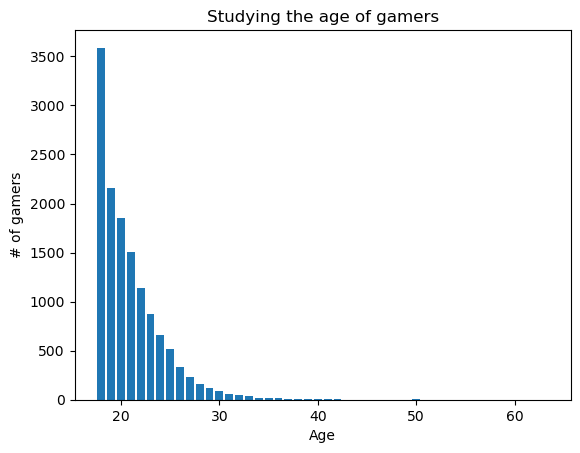

In [6]:
mean_age = np.mean(gaming_dat["Age"])
print(f"Mean age of the gamers: {np.round(mean_age, 0):.0f}")

age_count = gaming_dat['Age'].value_counts().reset_index()
plt.bar(age_count["Age"], age_count["count"])
plt.title("Studying the age of gamers")
plt.xlabel("Age")
plt.ylabel("# of gamers")
plt.show()

We can observe that most of the gamers are of the age 18 and the mean age of the gamers in our dataset is 21.

### Hypothesis 1
#### Which country has the highest average of anxiety levels in online gamers?

Approach: The GAD columns contain metrics for General Anxiety Disorder from category 1 to 7. We will take the average of these and group by country, and get the highest and lowest average value.

**A little background on the anxiety terminologies**

In Psychology, General Anxiety Disorder (GAD) has been divided into 7 categories:
1. GAD-1: Feeling nervous, anxious or on edge
2. GAD-2: Not being able to stop or control worrying
3. GAD-3: Worrying too much about different things
4. GAD-4: Trouble relaxing
5. GAD-5: Being so restless that it is hard to sit still
6. GAD-6: Becoming easily annoyed or irritable
7. GAD-7: Feeling afraid as if something awful might happen

The answer to GAD categories can be 0 - Not at all, 1 - Several days, 2 - More than half the days, 3 - Nearly everyday

SWL refers to Satisfaction with Life.

Here, a survey was conducted to curate this dataset which consisted of 5 questions which had to be answered with a SWL score on a scale of 1-5, 1 being Strongly disagree and 5 being Strongly Agree.

In [7]:
# Step 1: Calculate total GAD score per participant
gaming_dat['GAD_total'] = gaming_dat[['GAD1', 'GAD2',
                                      'GAD3', 'GAD4', 'GAD5', 'GAD6', 'GAD7']].sum(axis=1)

# Step 2: Group by country and calculate average GAD score
country_anxiety = gaming_dat.groupby('Residence_ISO3')['GAD_total'].mean()

# Step 3: Sort countries by average GAD score
country_anxiety_sorted = country_anxiety.sort_values(
    ascending=False).reset_index()

print(f"Based on online gaming data")
print(f"Highest average anxiety: {
      country_anxiety_sorted.iloc[0, 0]} - {country_anxiety_sorted.iloc[0, 1]}")
print(f"Lowest average anxiety: {
      country_anxiety_sorted.iloc[-1, 0]} - {country_anxiety_sorted.iloc[-1, 1]} ")

Based on online gaming data
Highest average anxiety: QAT - 16.333333333333332
Lowest average anxiety: FJI - 0.0 


Conclusion: Online gamers from Qatar have the highest anxiety levels and gamers from Fiji have the lowest anxiety levels.

But how about the satisfaction with life? Let's implement the same averaging approach but with SWL scores instead.

In [8]:
gaming_dat['SWL_total'] = gaming_dat[[
    'SWL1', 'SWL2', 'SWL5', 'SWL4', 'SWL5']].sum(axis=1)
country_swl = gaming_dat.groupby('Residence_ISO3')['SWL_total'].mean()
country_swl_sorted = country_swl.sort_values(
    ascending=False).reset_index().rename(columns={"SWL_total": "SWL_avg"})

print(f"Highest SWL average: {
      country_swl_sorted.iloc[0, 0]} - {country_swl_sorted.iloc[0, 1]}")
print(f"Highest SWL average: {
      country_swl_sorted.iloc[-1, 0]} - {country_swl_sorted.iloc[-1, 1]}")

print(f"Qatar SWL: {
      country_swl_sorted.loc[country_swl_sorted['Residence_ISO3'] == 'QAT', 'SWL_avg'].values[0]}")
print(f"Fiji SWL: {
      country_swl_sorted.loc[country_swl_sorted['Residence_ISO3'] == 'FJI', 'SWL_avg'].values[0]}")

Highest SWL average: NAM - 35.0
Highest SWL average: IDN - 8.0
Qatar SWL: 19.666666666666668
Fiji SWL: 12.0


Findings: Namibia has the highest SWL avg, whereas Indonesia has the least SWL average. Even though gamers in Qatar have the highest anxiety disorder, they have a moderate satisfaction with life.

### Hypothesis 2
#### Which age group suffers from the most anxiety?

In [9]:
# Mapping the GAD statement to the corresponding column names in the dataset
gad_statements = {
    'GAD1': 'Feeling nervous, anxious, or on edge',
    'GAD2': 'Not being able to stop or control worrying',
    'GAD3': 'Worrying too much about different things',
    'GAD4': 'Trouble relaxing',
    'GAD5': 'Being so restless that it`s hard to sit still',
    'GAD6': 'Becoming easily annoyed or irritable',
    'GAD7': 'Feeling afraid as if something awful might happen'
}

statement_columns = list(gad_statements.keys())
statement_labels = list(gad_statements.values())

In [10]:
gaming_dat_copy = gaming_dat.copy()

# Creating bins for age
age_bins = [18, 20, 25, 30, 100]
age_labels = ['18-20', '20-25', '25-30', '30+']
gaming_dat_copy['AgeBin'] = pd.cut(
    gaming_dat_copy.Age, age_bins, labels=age_labels)

# Creating bins for hours played per week
hour_bins = [0, 20, 40, 60, 80, 120]
hour_labels = ['0-20', '20-40', '40-60', '60-80', '80+']
gaming_dat_copy['HoursBin'] = pd.cut(
    gaming_dat_copy.Hours, hour_bins, labels=hour_labels)

# Prepare data for radar charts
radar_data = gaming_dat_copy.groupby(['AgeBin', 'HoursBin'])[
    statement_columns].mean().reset_index()

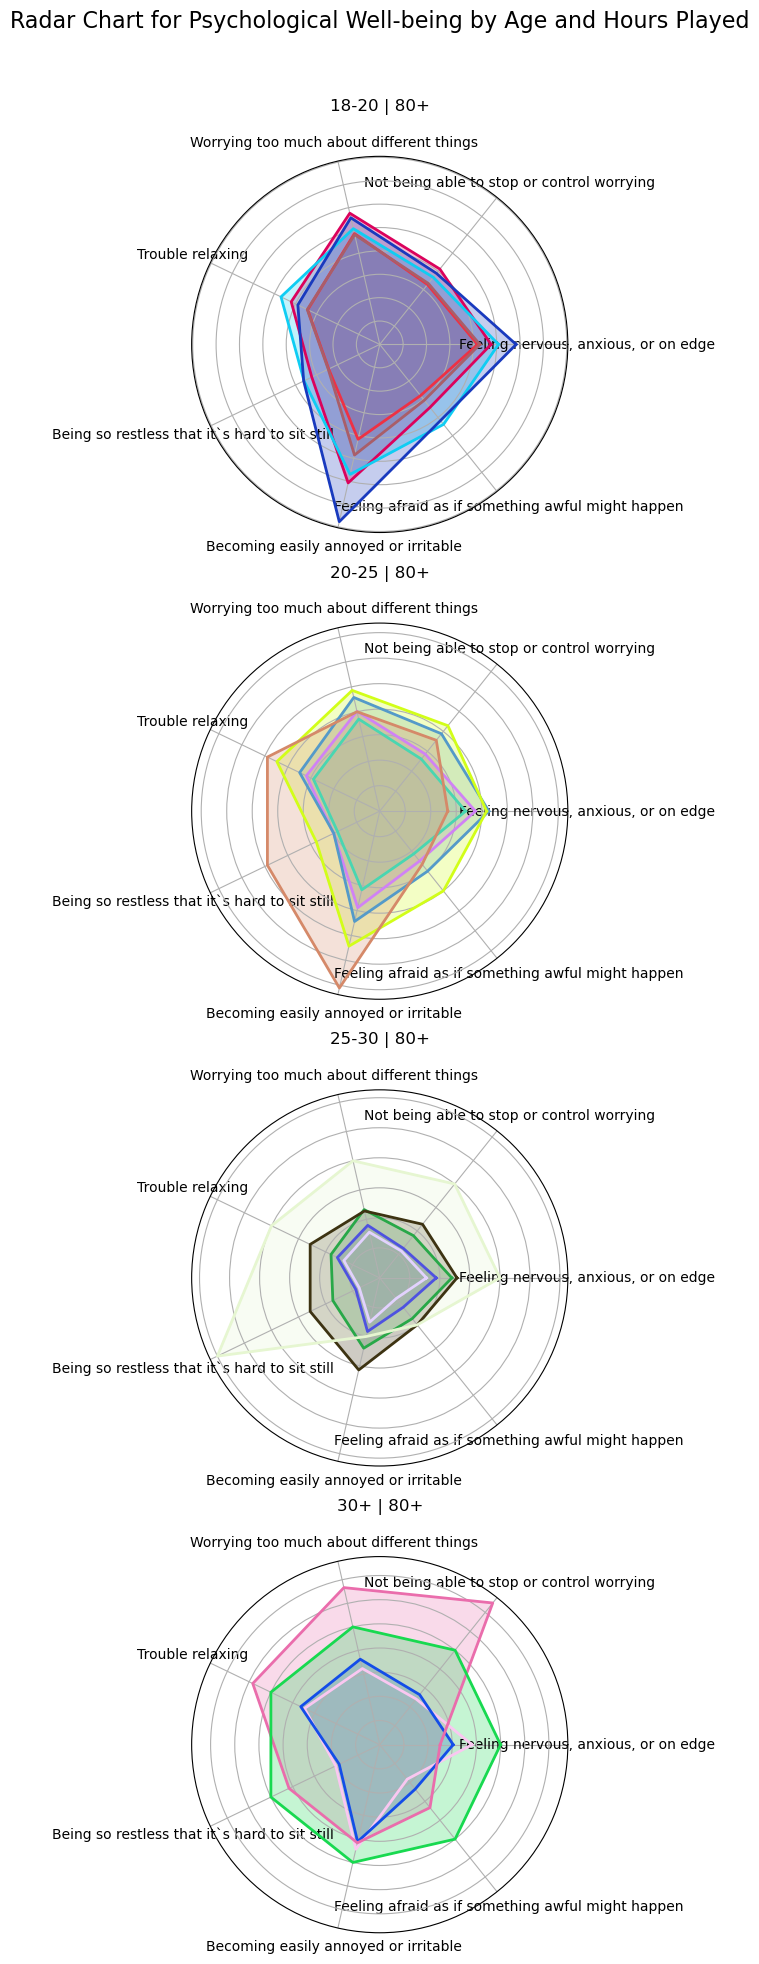

In [11]:
# Number of variables we're plotting (number of statements)
num_vars = len(statement_labels)

# Function to create radar chart


def radar_chart(ax, values, labels, color='blue', fill=True):
    # Compute angle for each axis
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    values = values.tolist()

    # Ensure values close the loop
    values += values[:1]
    angles += angles[:1]

    # Draw the outline of the radar chart
    ax.plot(angles, values, color=color, linewidth=2)
    if fill:
        ax.fill(angles, values, color=color, alpha=0.25)

    # Set the labels for each axis
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels)

    # Hide radial ticks
    ax.set_yticklabels([])


# Create subplots for each age zone
fig, axes = plt.subplots(len(age_labels), 1, figsize=(10, 20),
                         subplot_kw=dict(projection='polar'))
if len(age_labels) == 1:
    axes = [axes]  # Ensure axes is a list even for one subplot

# Iterate over each age zone and add radar plots
for idx, age_zone in enumerate(age_labels):
    age_data = radar_data[radar_data['AgeBin'] == age_zone]

    for _, row in age_data.iterrows():
        radar_chart(
            axes[idx],
            row[statement_columns].values,
            statement_labels,
            color=np.random.rand(3,)
        )
        axes[idx].set_title(f"{row['AgeBin']} | {
                            row['HoursBin']}", size=12, color='black', y=1.1)

# Set a title for the entire figure
plt.suptitle(
    "Radar Chart for Psychological Well-being by Age and Hours Played", size=16)

# Adjust the layout to accommodate the title
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

**Conclusion** \
From the radar charts, it can be seen that young gamers from the age group 18-25 suffer from more anxiety in all areas.

Age group 18-20 & 21-25 is feeling afraid as if something awful might happen (GAD-7) \
Age group 25-30 is mostly restless and find it hard to sit still (GAD-5) \
Ages 30+ are mostly not able to stop or control worrying (GAD-2)


#### Phase 2: Applying ML Algorithms

Before we proceed to fit our dataset, we will one-hot encode the columns with object data type, and normalize the columns of relevance

In [12]:
# Start of code - added for phase 2  - 10/29/2024

# selecting the columns with object data type
object_cols = gaming_dat.select_dtypes(include='object')
# printing the columns
object_cols.columns

Index(['GADE', 'Game', 'Platform', 'earnings', 'whyplay', 'League', 'Gender',
       'Work', 'Degree', 'Birthplace', 'Residence', 'Reference', 'Playstyle',
       'accept', 'Residence_ISO3', 'Birthplace_ISO3'],
      dtype='object')

In [13]:
# we will encode all the columns with the data type as object
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in object_cols:
    gaming_dat[i] = le.fit_transform(gaming_dat[i])

# checking if the object type columsn are converted
gaming_dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13464 entries, 0 to 13463
Data columns (total 54 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   GAD1             13464 non-null  int64  
 1   GAD2             13464 non-null  int64  
 2   GAD3             13464 non-null  int64  
 3   GAD4             13464 non-null  int64  
 4   GAD5             13464 non-null  int64  
 5   GAD6             13464 non-null  int64  
 6   GAD7             13464 non-null  int64  
 7   GADE             13464 non-null  int32  
 8   SWL1             13464 non-null  int64  
 9   SWL2             13464 non-null  int64  
 10  SWL3             13464 non-null  int64  
 11  SWL4             13464 non-null  int64  
 12  SWL5             13464 non-null  int64  
 13  Game             13464 non-null  int32  
 14  Platform         13464 non-null  int32  
 15  Hours            13464 non-null  float64
 16  earnings         13464 non-null  int32  
 17  whyplay     

In [14]:
# we will normalize the columns of relevance using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
cols = ['GAD_T', 'SWL_T', 'SPIN_T']
sc = MinMaxScaler()
gaming_dat[cols] = sc.fit_transform(gaming_dat[cols])

### ML Algorithm 1: K-Means Clustering + Random Forest Classifier

In [15]:
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

## for visualizing the K-Means clusters, we need to reduce the dimensionality o fthe dataset from 55 to 2 features using PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
x = pca.fit_transform(gaming_dat[['GAD_T', 'SWL_T','SPIN_T']])

kmns = KMeans(n_clusters=3, init='k-means++',max_iter = 300, n_init = 40)
y_kmn_clusters = kmns.fit_predict(x)

  File "c:\Users\apoor\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\apoor\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\apoor\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\apoor\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


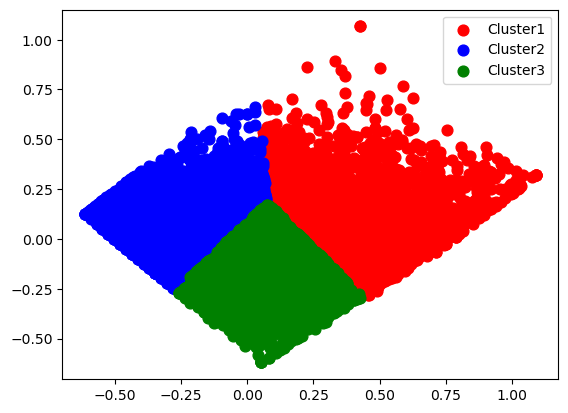

In [16]:
# Plotting the clusters
plt.scatter(x[y_kmn_clusters == 0, 0], x[y_kmn_clusters == 0, 1], s = 60, c = 'red', label = 'Cluster1')
plt.scatter(x[y_kmn_clusters == 1, 0], x[y_kmn_clusters == 1, 1], s = 60, c = 'blue', label = 'Cluster2')
plt.scatter(x[y_kmn_clusters == 2, 0], x[y_kmn_clusters == 2, 1], s = 60, c = 'green', label = 'Cluster3')

plt.legend()
plt.show()

In [17]:
X_train, X_test, y_train_kmns, y_test_kmns = train_test_split(
    gaming_dat, y_kmn_clusters, test_size=0.2, random_state=33)

model_rndm_frst = RandomForestClassifier()
model_rndm_frst.fit(X_train, y_train_kmns)

RandomForestClassifier()

In [18]:
y_rndm_frst_pred = model_rndm_frst.predict(X_test)

In [19]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print(f'Accuracy: {accuracy_score(y_test_kmns, y_rndm_frst_pred)}')
print(f'Classification Report: \n{classification_report(y_test_kmns, y_rndm_frst_pred)}')

cm = confusion_matrix(y_test_kmns, y_rndm_frst_pred)
print(cm)

Accuracy: 0.9795766802822131
Classification Report: 
              precision    recall  f1-score   support

           0       0.97      0.96      0.97       564
           1       0.98      0.99      0.99      1145
           2       0.98      0.97      0.98       984

    accuracy                           0.98      2693
   macro avg       0.98      0.98      0.98      2693
weighted avg       0.98      0.98      0.98      2693

[[ 543    7   14]
 [   4 1137    4]
 [  13   13  958]]


### ML Algorithm 2: Agglomerative Clustering + K-Nearest Neighbors Classifier

In [20]:
# We know that the dataset has 3 clusters as per the Kaggle datacard - Anxiety, Satisfaction with Life, Social Phobia
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
y_hc_clusters = hc.fit_predict(gaming_dat)

In [21]:
# once we have our clusters from Agglomerative (Hierarchical) Clustering, and used to them to define our labels for the dataset, we can proceed with the KNN classifier
from sklearn.neighbors import KNeighborsClassifier
X_train, X_test, y_train_hc, y_test_hc = train_test_split(
    gaming_dat, y_hc_clusters, test_size=0.2, random_state=33)

model_knn = KNeighborsClassifier()
model_knn.fit(X_train, y_train_hc)

KNeighborsClassifier()

In [22]:
y_knn_pred = model_knn.predict(X_test)

In [23]:
print(f'Accuracy: {accuracy_score(y_test_hc, y_knn_pred)}')
print(f'Classification Report: \n{classification_report(y_test_hc, y_knn_pred)}')

cm = confusion_matrix(y_test_hc, y_knn_pred)
print(cm)

Accuracy: 0.9981433345711103
Classification Report: 
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       509
           1       1.00      1.00      1.00      1266
           2       1.00      1.00      1.00       918

    accuracy                           1.00      2693
   macro avg       1.00      1.00      1.00      2693
weighted avg       1.00      1.00      1.00      2693

[[ 508    0    1]
 [   0 1266    0]
 [   3    1  914]]
